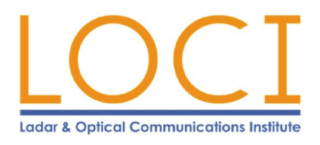

# Function: Photons Returned 

![lidarflow44](lidarflow44.gif)


In [2]:
#Importing libraries
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Layout, widgets
#import matplotlib.image as mpimg

#setting constants
#HV = 5000  #Human Visibility (m) number
#EPP = 0.2   #Energy per pulse (mjoule) number
#RAD = 25   #Receiver Aperture Diameter (mm) number
NUMPT = 100 #number of points on graph


def plot_func(HV,EPP,RAD,Range_Low,Range_High): #print('start plot func')

        #input limit validation
        if (EPP <= 0) : 
            EPP = 0.001
        if (HV <= 0) : 
            HV = 0.001
        if (RAD <= 0) : 
            RAD = 0.001
        
        #calculations
        B55 = -(math.log(0.05))/HV #idk find out
        B155 = B55*(1.55/0.55)**-(0.1428*1.55-0.0947) #idk find out
        SS = (Range_High - Range_Low)/NUMPT
        #print('start loop')
        PRList = np.zeros(NUMPT)
        IRList = np.zeros(NUMPT)
        for cnt in range (0,NUMPT) : 
            IRTEMP = Range_Low + cnt*SS
            OWT = math.exp(-B155*IRTEMP)  #One Way Transmission
            TWT = OWT**2 #Two Way Transmission
            PR = EPP*0.001*(0.1/64**2)*((0.001*RAD)/(IRTEMP)**2*(0.00000155/(300000000*6.64E-34)*TWT*0.6))   #number of photons received from a 10% reflective object
            #print('Photons Returned = ', PR,'IRTEMP = ',IRTEMP, 'count = ',cnt)
            PRList[cnt] = PR 
            IRList[cnt] = IRTEMP
            cnt +=1
            # print('now n=',cnt , NUMPT)

        plt.style.use('classic')
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.add_subplot(1, 1, 1)
        ax1.plot(IRList, PRList,':r',linewidth=3)
        plt.axis([Range_Low, Range_High,0,max(PRList)])
        plt.title('Photons Returned')
        plt.ylabel('# of Photons Returned')
        plt.xlabel('Range (m)')
      
        #add tickmarks
        major_xticks = np.arange(Range_Low, Range_High, (Range_High - Range_Low)/10)
        minor_xticks = np.arange(Range_Low, Range_High, (Range_High - Range_Low)/50)
        ax1.set_xticks(major_xticks)
        ax1.set_xticks(minor_xticks, minor=True)
        # And a corresponding grid
        ax1.grid(which='minor', alpha=0.25)
        ax1.grid(which='major', alpha=0.75)

        #print('end of loop', PRList)


style1 = {'description_width': 'initial'} 
interact(plot_func,
             HV = widgets.FloatText(value=5000,min = 0.001, step=500, description = 'Human Visibility(m)',style=style1),
             EPP = widgets.FloatText(value=0.2, min = 0.001, step=0.05, description = 'Energy Per Pulse(mJ)',style=style1),
             RAD = widgets.FloatText(value=25,min = 0.001, step=1, description = 'Receiver Aperture Diameter(m)',style=style1),
             Range_Low = widgets.FloatSlider(value=30, min=10, max=1000, step=10, description ="Range Low  (m)", layout=Layout(width='400px'), continuous_update = False,style=style1),
             Range_High = widgets.FloatSlider(value=100, min=10, max=1000, step=10, description ="Range High (m)",  layout=Layout(width='400px'), continuous_update = False,style=style1),
            ) 

#print('done')

        


interactive(children=(FloatText(value=5000.0, description='Human Visibility(m)', step=500.0, style=Description…

<function __main__.plot_func(HV, EPP, RAD, Range_Low, Range_High)>

# Code By Ryan Devitt